# Bitcoin

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Preprocessing Steps

In [ ]:
# bitcoin = pd.read_csv('bitcoin_original.csv')
# bitcoin = bitcoin.drop(columns=['Unnamed: 0'])
# for name in bitcoin.columns[1:-2]:
#     bitcoin[name] = bitcoin[name].str.replace(',', '').astype(float)
# bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
# bitcoin = bitcoin.sort_values('Date')
# bitcoin['Average'] = (bitcoin['High'] + bitcoin['Low']) / 2
# bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
# bitcoin.head()

,Unnamed: 0,Date,Price,Open,High,Low,Vol.,Change %
0,0,01/01/2025,"94,560.2","93,557.3","95,100.0","92,939.3",43.34K,1.07%
1,1,12/31/2024,"93,557.2","92,777.2","96,163.4","92,036.2",74.85K,0.84%
2,2,12/30/2024,"92,779.8","93,718.7","94,936.4","91,522.3",112.43K,-1.00%
3,3,12/29/2024,"93,716.3","95,282.6","95,315.4","93,026.7",47.71K,-1.65%
4,4,12/28/2024,"95,284.5","94,274.9","95,684.3","94,124.7",32.97K,1.07%
...,...,...,...,...,...,...,...,...
5277,2355,07/22/2010,0.1,0.1,0.1,0.1,2.16K,0.00%
5278,2356,07/21/2010,0.1,0.1,0.1,0.1,0.58K,0.00%
5279,2357,07/20/2010,0.1,0.1,0.1,0.1,0.26K,0.00%
5280,2358,07/19/2010,0.1,0.1,0.1,0.1,0.57K,0.00%


In [ ]:
bitcoin = pd.read_csv('data.csv', parse_dates=['Date'])

In [140]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      5282 non-null   object
 1   Price     5282 non-null   object
 2   Open      5282 non-null   object
 3   High      5282 non-null   object
 4   Low       5282 non-null   object
 5   Vol.      5276 non-null   object
 6   Change %  5282 non-null   object
dtypes: object(7)
memory usage: 289.0+ KB


In [141]:
# See if there are any missing values
bitcoin.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    0
dtype: int64

In [143]:
bitcoin.describe()

,Date,Price,Open,High,Low,Change %
count,5282,5282,5282,5282,5282,5282
unique,5282,4327,4320,4315,4324,1567
top,07/18/2010,0.1,0.1,0.1,0.1,0.00%
freq,1,100,100,97,101,429


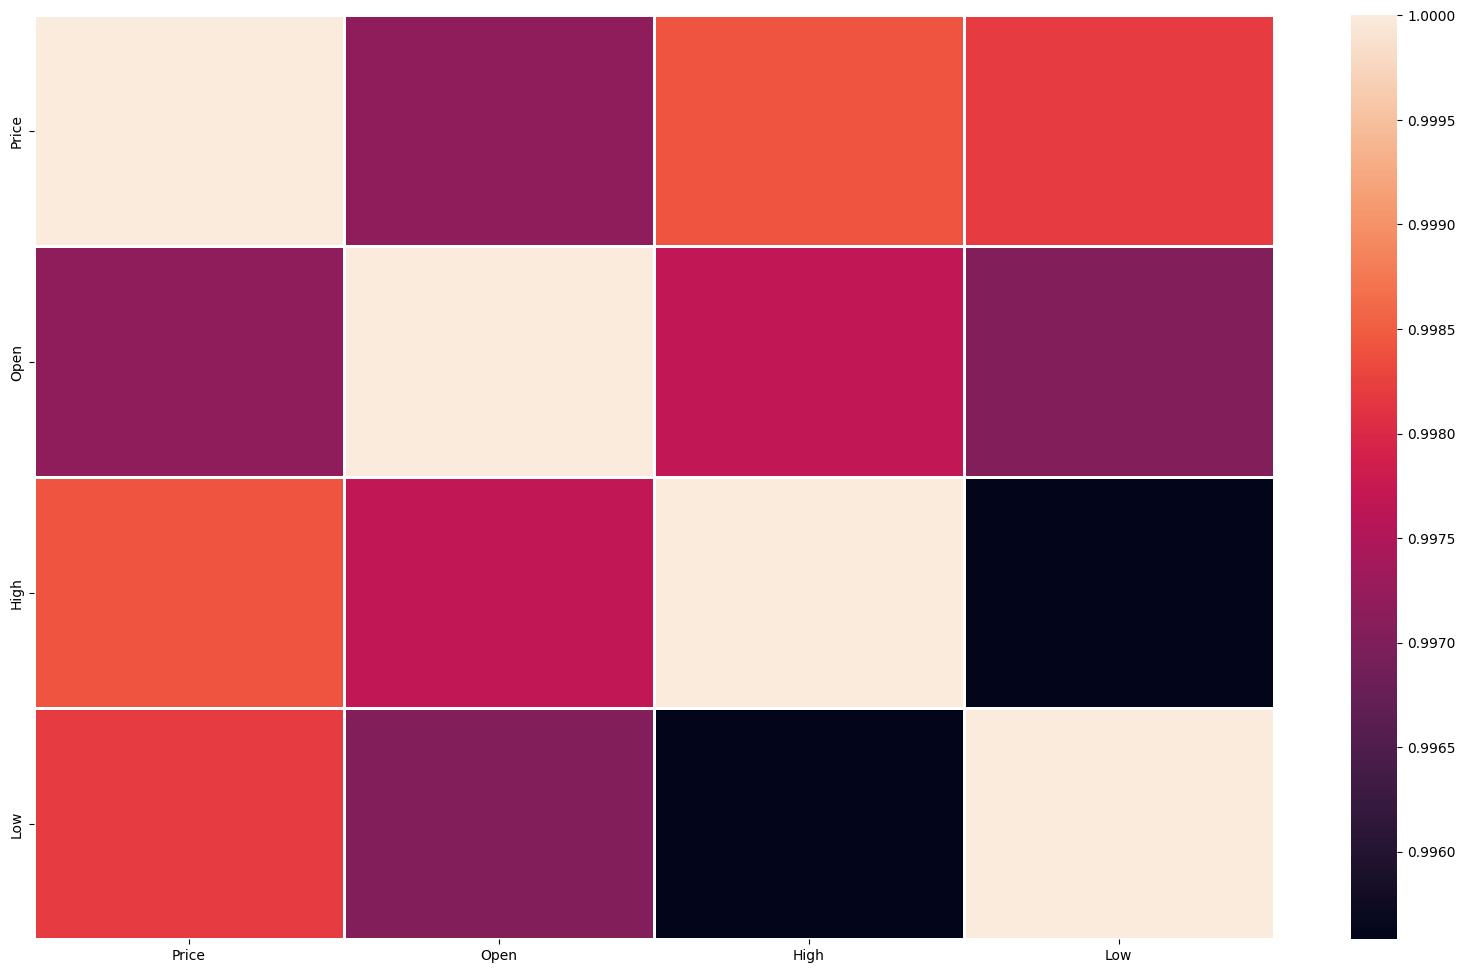

In [148]:
fig, ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(bitcoin.iloc[:,:-1].corr(), linewidths=1)
plt.show()

---

In [151]:
# Resampling
# Daily frequency
df = bitcoin.resample('D').mean()

# Monthly frequency
df_month = bitcoin.resample('ME').mean()

# Annual frequency
df_year = bitcoin.resample('YE-DEC').mean()

# Quarterly frequency
df_Q = bitcoin.resample('QE-DEC').mean()

TypeError: agg function failed [how->mean,dtype->object]

Visualizing the prediction accuracy by the volume data available. The more data, the more precise the trend line is.

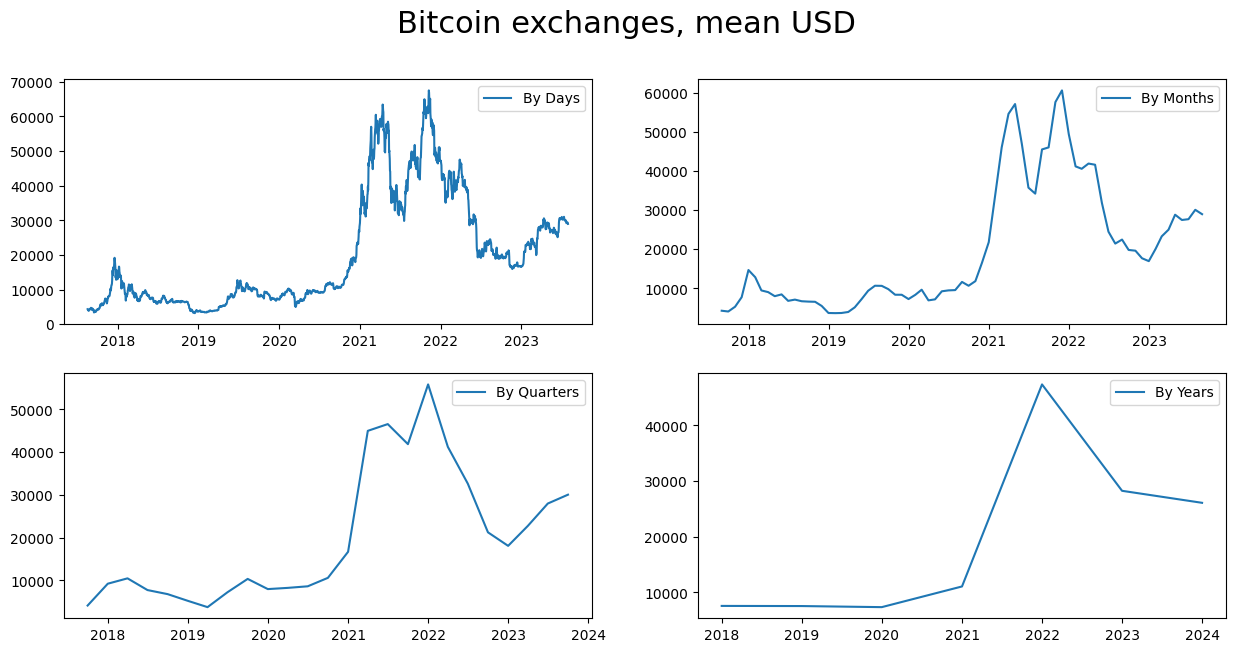

In [48]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df["open"], '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month["open"], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q["open"], '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year["open"], '-', label='By Years')
plt.legend()

plt.show()

In [ ]:
features = ['open', 'high', 'low', 'Volume BTC']
target = 'close'

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(bitcoin[features + [target]])